In [3]:
%matplotlib widget
import pyvisa
import matplotlib.pyplot as plt
import numpy as np
import NA_N9916A
import time

In [6]:
# 8.5718125 GHz 
# -26 dB
# 10 MHz di span
###############################
                            
ip          = '192.168.40.10'   
mode        = 'NA'              
s_par       = 'S21'       
f_center = 8.5718125e9
f_span = 20e6   
n_pts = 1000
hdf5_file   = '2024-04-18.hdf5'            
                            
###############################


vna = NA_N9916A.N9916A(ip)

Connection successful!


In [19]:
vna.get_name()

Keysight Technologies,N9916A,MY53104702,A.08.01



In [7]:
vna.reset()
vna.clear()
vna.set_mode(mode)

if mode == 'NA': 
    vna.set_NA_par(s_par)
    name_group = f'{mode}_{s_par}'
elif mode == 'SA':
    name_group = mode
vna.set_freq_center(f_center)

for i in SPAN:
    for j in NUM:

        vna.set_num_pts(j)
        vna.set_freq_span(i)
        sweep = vna.get_data()
        sweep['Num pts'] = j
        sweep['Span'] = i
        vna.w_hdf(hdf5_file, name_group, sweep)
        time.sleep(2)

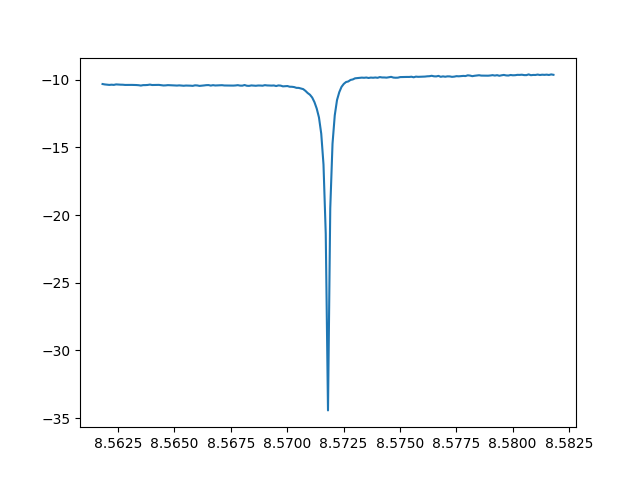

In [31]:
I_mean = np.array([])
Q_mean = np.array([])
f_mean = np.array([])

saved_sweep = vna.r_hdf_data(hdf5_file, 'NA_S21', 0)

I, Q, f = saved_sweep.values()


amp = 10*np.log10(I**2 + Q**2) # amplitude

plt.clf()
plt.plot(f, amp)
plt.show()

# Fitting